# Aufgabe 4


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot


# a) Datensatz einlesen und Format der kategorischen Variablen mittels One-Hot Encoding anpassen


In [3]:
#Read the CSV File
credit_df = pd.read_csv("Datasets/Credit.csv", index_col=0)
dummie_df = pd.get_dummies(credit_df)
#Rename Ethnicity_African American to avoid problems with the whitespace
dummie_df.rename(columns = {'Ethnicity_African American': 'Ethnicity_AfricanAmerican'}, inplace = True)

#Drop columns that contain redundant information
dummie_df.drop('Gender_Female', inplace=True, axis=1)
dummie_df.drop('Student_No', inplace=True, axis=1)
dummie_df.drop('Married_No', inplace=True, axis=1)


Der Datensatz wird eingelesen und die kategorischen Variablen werden mit der get_dummies() Funktion von Pandas in ein One-Hot encoded Format gebracht. Es werden dann die Spalten der binären Variablen Gender_Male, Student_No, Married_No entfernt, da diese Informationen implizit durch die verbleibenden Spalten Gender_Female, Student_Yes, Married_Yes gegeben sind. Die drei resultierenden Spalten der Ethnicity Variable bleiben zunächst im Datensatz enthalten.


## Datensatz erkunden

/Library/Python/3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


    Income  Limit  Rating  Cards  Age  Education  Balance  Gender_Male  \
1   14.891   3606     283      2   34         11      333            1   
2  106.025   6645     483      3   82         15      903            0   
3  104.593   7075     514      4   71         11      580            1   
4  148.924   9504     681      3   36         11      964            0   
5   55.882   4897     357      2   68         16      331            1   

   Student_Yes  Married_Yes  Ethnicity_AfricanAmerican  Ethnicity_Asian  \
1            0            1                          0                0   
2            1            1                          0                1   
3            0            0                          0                1   
4            0            0                          0                1   
5            0            1                          0                0   

   Ethnicity_Caucasian  
1                    1  
2                    0  
3                    0  
4   

Ethnicity
African American    AxesSubplot(0.555556,0.125;0.344444x0.328261)
Asian               AxesSubplot(0.555556,0.125;0.344444x0.328261)
Caucasian           AxesSubplot(0.555556,0.125;0.344444x0.328261)
Name: Balance, dtype: object

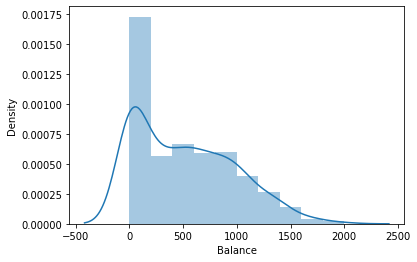

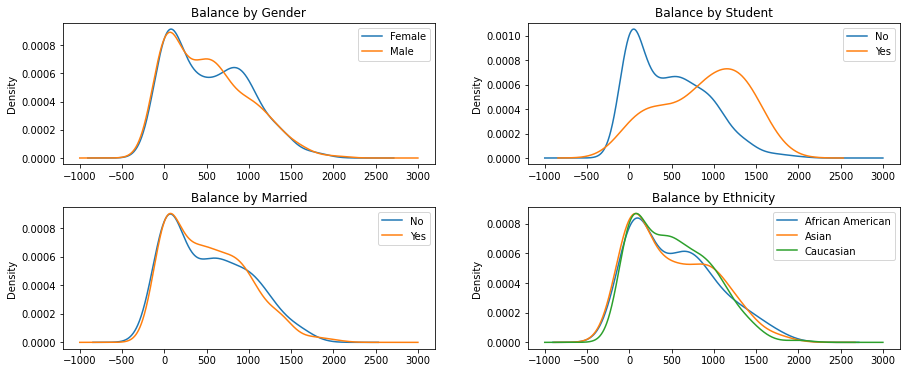

In [6]:
#Exploration: Dataset and description
print(dummie_df.head())
print(dummie_df.describe())

#Exploration: Distribution of Balance variable
sns.distplot(credit_df.Balance)

#Exploration: Categories vs Balance
f, axes = plt.subplots(2, 2, figsize=(15, 6))
f.subplots_adjust(hspace=.3, wspace=.25)
credit_df.groupby('Gender').Balance.plot(kind='kde', ax=axes[0][0], legend=True, title='Balance by Gender')
credit_df.groupby('Student').Balance.plot(kind='kde', ax=axes[0][1], legend=True, title='Balance by Student')
credit_df.groupby('Married').Balance.plot(kind='kde', ax=axes[1][0], legend=True, title='Balance by Married')
credit_df.groupby('Ethnicity').Balance.plot(kind='kde', ax=axes[1][1], legend=True, title='Balance by Ethnicity')


## b) Train-Test-Split: 80%-20%


In [7]:
#Split the dataset into training and test set with distribution 80% training, 20% test.
train, test = train_test_split(dummie_df, test_size=0.2, random_state=123)

X = dummie_df.drop('Balance', axis=1)
y = dummie_df['Balance']
cols = list(dummie_df.columns)[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


Wir füren den Split hier doppelt durch, da statsmodels.formula.api den vollständigen Datensatz, also inklusive Zielvariable benötigt. Für den RandomForrestRegressor welcher später verwendet wird eine andere Aufteilung benötigt, weshalb hier der Datensatz in erklärende Variablen und Zielvariable jeweils für Test und Training separiert wird.
In jedem Fall wird die train_test_split Methode aus sklearn verwendet um eine zufällige Verteilung von 80% zu 20% der Daten auf Trainings- und Test-Set zu gewährleisten. Um Vergleichbarkeit sicherzustellen, wird zudem ein random_state gesetzt.


## c) Lineare Regression mit OLS


In [8]:
model_ols = smf.ols('Balance ~ Income + Rating + Cards + Age + Education +  Gender_Male + Student_Yes + Married_Yes + Ethnicity_Caucasian + Ethnicity_AfricanAmerican + Ethnicity_Asian', data = train).fit()
print(model_ols.summary())

pred = model_ols.predict(test)

#Calculate Root Mean Squared Error
MSE = mean_squared_error(test['Balance'], pred)
RMSE = math.sqrt(MSE)
print("----------- Root Mean Square Error -----------")
print("RMSE: " + str(RMSE))


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     594.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.36e-195
Time:                        11:52:25   Log-Likelihood:                -1931.0
No. Observations:                 320   AIC:                             3884.
Df Residuals:                     309   BIC:                             3926.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Der Root Mean Square Error (RMSE) ist eine Maßzahl zur Beurteilung der Prognosegüte. Er gibt an, wie gut eine Funktionskurve an vorliegende Daten angepasst ist, bzw. wie stark eine Prognose im Durchschnitt von den tatsächlichen Beobachtungswerten abweicht. Berechnet wird der RMSE aus der Quadratwurzel des durchschnittlichen Prognosefehlers. Je größer der RMSE ist, desto schlechter ist die Anpassung des Modells. Da der RMSE die selbe Einheit wie die abhängige Variable hat, muss man, um diesen sinnvoll interpretieren zu können, die Variable Balance zunächst genauer betrachten. Balance hat Werte im Intervall [0, 1999].
Bei der hier durchgeführten Analyse liegt der RMSE Wert bei 105,51. Das bedeutet, dass der RMSE Wert eine einigermaßen akzeptable Größe besitzt und damit die Qualität des Modells, in Bezug auf die Genauigkeit, ebenfalls als gut angesehen werden kann.


## d) Lineare Regression mit OLS (Ohne die Variable Ethnicity_Caucasian)


In [9]:
model_ols_no_caucasian = smf.ols('Balance ~ Income + Rating + Cards + Age + Education +  Gender_Male + Student_Yes + Married_Yes + Ethnicity_AfricanAmerican + Ethnicity_Asian', data = train).fit()
print(model_ols_no_caucasian.summary())

pred = model_ols.predict(test)

#Calculate Root Mean Squared Error
MSE = mean_squared_error(test['Balance'], pred)
RMSE = math.sqrt(MSE)
print("----------- Root Mean Square Error -----------")
print("RMSE: " + str(RMSE))


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     594.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.36e-195
Time:                        11:53:28   Log-Likelihood:                -1931.0
No. Observations:                 320   AIC:                             3884.
Df Residuals:                     309   BIC:                             3926.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Nachdem die Analyse erneut ohne die Variable Ethnicity_Caucasian durchgeführt wurde, konnte keine Veränderung des RMSE-Wertes festgestellt werden. Das Entfernen der Variablen hat also keine Einfluss auf die Genauigkeit der Vorhersage.


## e) 


In [10]:
#Income, Limit, Age
print("---------------------- Income, Limit, Age ----------------------")
model_ols_1 = smf.ols('Balance ~ Income + Limit + Age', data = train).fit()
print(model_ols_1.summary())
print("Confidence Interval")
print(model_ols_1.conf_int(alpha=0.05, cols=None))


---------------------- Income, Limit, Age ----------------------
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     731.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          8.96e-142
Time:                        11:53:44   Log-Likelihood:                -2080.7
No. Observations:                 320   AIC:                             4169.
Df Residuals:                     316   BIC:                             4184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Den stärksten Einfluss, mit einem Koeffizientenwert von -8,07 hat die Variable Income. Dieser Wert ist signifikant (bei einem Signifikanzniveau von 0.05). Limit ist ebenfalls signifikant, hat jedoch mit einem Koeffizientenwert von 0,27 kaum Einfluss und das Konfidenzintervall ist sehr schmal. Age ist die einzige nicht signifikante Variable und hat ebenfalls nur geringen Einfluss (Koeffizientenwert -0,82). Die Konfidenzintervalle von Income und Age sind nicht auffällig.


In [11]:
#Income, Rating, Age
print("--------------------- Income, Rating, Age ----------------------")
model_ols_2 = smf.ols('Balance ~ Income + Rating + Age', data = train).fit()
print(model_ols_2.summary())
print("Confidence Interval")
print(model_ols_2.conf_int(alpha=0.05, cols=None))


--------------------- Income, Rating, Age ----------------------
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     756.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          7.91e-144
Time:                        11:54:19   Log-Likelihood:                -2075.9
No. Observations:                 320   AIC:                             4160.
Df Residuals:                     316   BIC:                             4175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Die Koeffizientenwerte der Variablen Income und Age haben sich kaum geändert.
Den stärksten Einfluss, mit einem Koeffizientenwert von -7,98 hat erneut die Variable Income. Dieser Wert ist signifikant (bei einem Signifikanzniveau von 0.05). Rating ist ebenfalls signifikant und hat, im Gegensatz zu Limit aus der vorherigen Analyse, mit einem Koeffizientenwert von 4,00 den zweitstärksten und wesentlich deutlicheren Einfluss. Rating hat ein breiteres Konfidenzintervall im Vergleich zu Limit.
Age ist erneut die einzige nicht signifikante Variable und hat ebenfalls nur geringen Einfluss (Koeffizientenwert -0,88). Die Konfidenzintervalle von Income und Age sind, im Vergleich zur vorherigen Analyse, nur wenig verändert und nicht auffällig.


In [12]:
#Income, Limit, Rating, Age
print("--------------------- Income, Limit, Rating, Age ---------------------")
model_ols_3 = smf.ols('Balance ~ Income + Limit + Rating + Age', data = train).fit()
print(model_ols_3.summary())
print("Confidence Interval")
print(model_ols_3.conf_int(alpha=0.05, cols=None))


--------------------- Income, Limit, Rating, Age ---------------------
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     571.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.05e-143
Time:                        11:54:57   Log-Likelihood:                -2074.3
No. Observations:                 320   AIC:                             4159.
Df Residuals:                     315   BIC:                             4178.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Die Werte der Variablen Income und Age haben sich kaum geändert. Die Koeffizientenwerte, also der Einfluss, der Werte Limit und Rating, hat sich im Vergleich zu den beiden vorherigen Analysen verringert. Auch ist Limit nun nicht mehr signifikant (bei einem Signifikanzniveau von 0.05). Die Konfidenzintervalle von Limit und Rating haben sich verbreitert.


## f) Korrelation
Eine Korrelation beschreibt eine Beziehung zwischen zwei oder mehreren Merkmalen bzw. Variablen.
Die Korrelation ist dabei ein statistisches Maß, das anzeigt, inwieweit sich zwei oder mehrere Variablen gleichzeitig verändern. Eine positive Korrelation besagt, dass sich alle Variablen parallel ändern, wogegen bei einer negativen Korrelation die Verläufe gegensätzlich sind, das heißt erhöht sich eine Variable, nimmt die andere ab.

1. Pearson Korrelation:
Die Pearson Korrelation ist eine Möglichkeit, den linearen Zusammenhang zweier Variablen zu bestimmen. Dabei dient der Korrelationskoeffizient nach Pearson als Maßzahl für die Stärke der Korrelation der intervallskalierten Merkmale und nimmt Werte zwischen -1 und 1 an .
Der Bravais Pearson Korrelationskoeffizient kann nur lineare Zusammenhänge erkennen. Sind zwei Variablen also scheinbar unkorreliert, kann immer noch ein nichtlinearer, also beispielsweise ein exponentieller oder quadratischer, Zusammenhang bestehen. Außerdem ist seine Berechnung nur bei kardinalskalierten Daten möglich.
Die PearsonKorrelation wird also verwendet, wenn ein linearer Zusammenhang zwischen den Variablen besteht und die Daten kardinalskaliert sind.

2. Spearman Korrelation:
Während der Pearson Korrelationskoeffizient auf Basis der Ausprägungen berechnet wird, bezieht sich die Spearman Korrelation auf die Ränge der Ausprägungen. Die absoluten Abstände zwischen den Daten sind also nicht relevant. Das heißt, diese Koeffizienten können sowohl für kardinal-, als auch ordinalskalierte Datensätze berechnet werden.

3. Kendall Tau:
Kendalls Tau ist zur Spearman Korrelation im Hinblick auf die Voraussetzungen äquivalent. Beide Maße sind auch in ihrer statistischen Schärfe vergleichbar. Spearmans R und Kendalls Tau sind jedoch gewöhnlich nicht identisch, da sich sowohl die Grundlagen ihrer Konstruktion als auch die Formeln, auf deren Basis sie berechnet werden, stark unterscheiden. Siegel und Castellan (1988) beschreiben die Beziehung zwischen den beiden Maßen durch die folgende Ungleichung:
-1 <= 3 * Kendalls Tau - 2 * Spearmans R <= 1


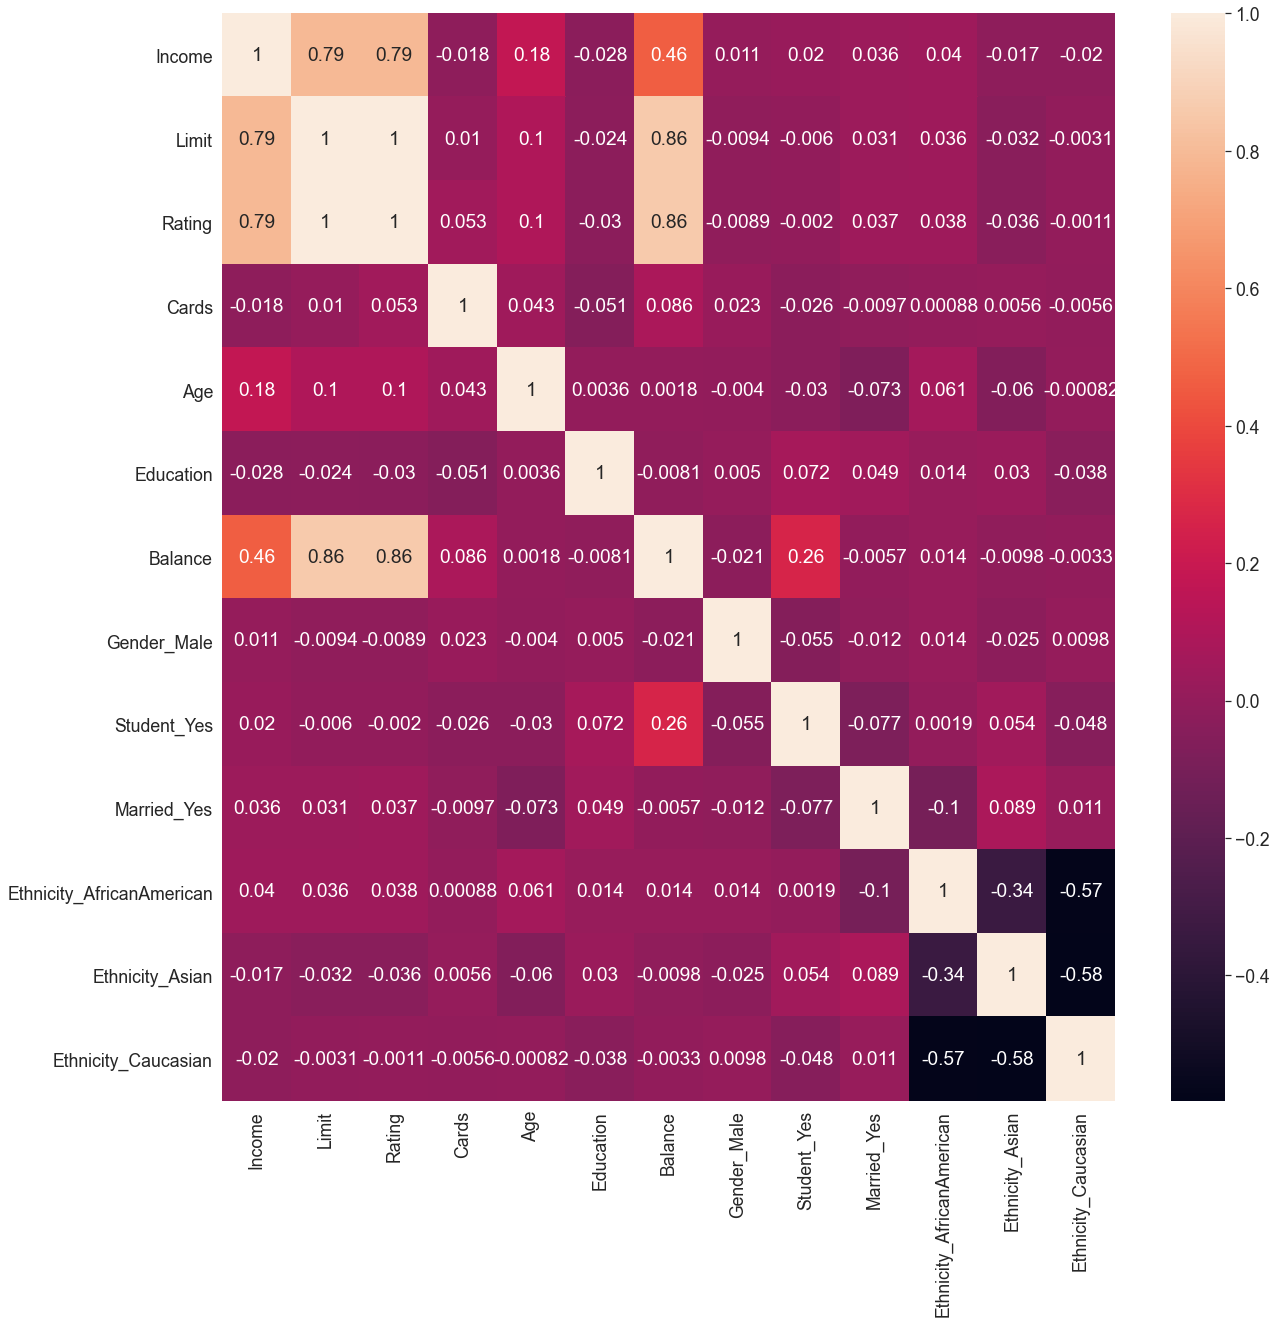

In [13]:
#Exploration: Correlation Matrix
plt.figure(figsize=(20,20))
correlation_mat = dummie_df.corr(method='pearson')
sns.set(font_scale=1.6)
sns.heatmap(correlation_mat, annot = True)
plt.show()


Wie man der Korrelationsmatrix entnehmen kann, liegen zwischen den Variablen Rating und Limit sowie Rating bzw. Limit und Income starke positive Korrelationen vor. Ethnicity_African American bzw. Ethnicity_Asian und Ethnicity_Caucasian sind stark negativ korreliert. Ethnicity_African American und Ethnicity_Asian weisen eine mäßig starke negative Korrelation auf.

Außerdem ist die Variable Balance mit einigen anderen Variablen stark korreliert. Dies ist jedoch kein Problem, da es sich bei Balance nicht um eine erklärende, sondern um die Zielvariabel handelt.

Um aus der Regressionsanalyse zuverlässige Ergebnisse zu bekommen und das Problem der Multikollinearität zu vermeiden, sollte die Variable Limit aufgrund der starken Korrelation zu Rating und Income nicht verwendet werden. Gleiches gilt für eine der Ethnicity Variablen. Hier bietet es sich an Ethnicity_Caucasian zu entfernen, da hier die stärkste negative Korrelation gegenüber den anderen Ethnicity Variablen auftritt.



## g) Random Forrest
Im folgenden wid die Analyse aus Teilaufgabe e) nun noch einmal mit einem Random Forest Regressor durchgeführt


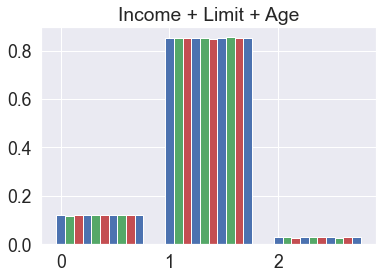

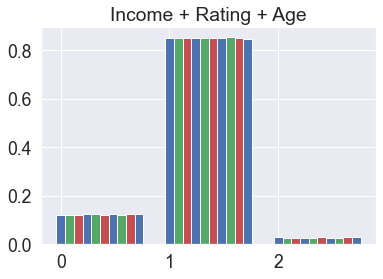

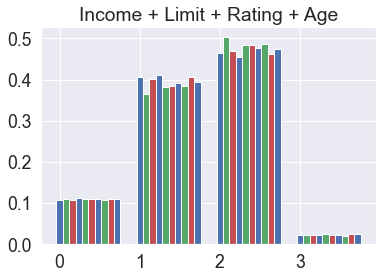

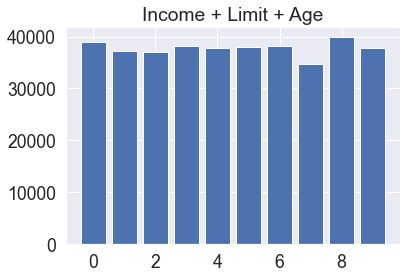

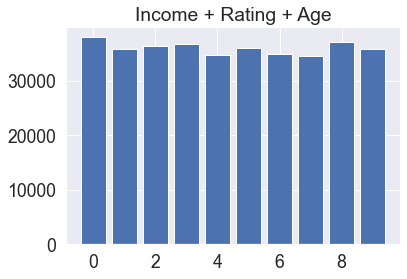

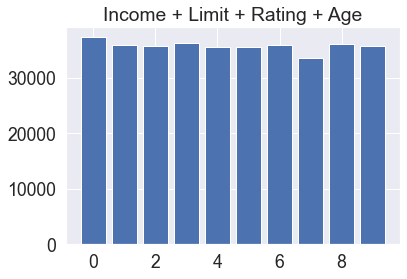

"for i,v in enumerate(importance):\n    #\tprint(cols[i] + ', Score: %.5f' % v)\n    plt.text(v, i, '%.2f' % v)\npyplot.barh([x for x in cols], importance)\n#plt.title('Feature importances')\npyplot.show()"

In [35]:
rnd_states = [1, 33, 135, 123, 99, 22, 77, 88, 1337, 10]
feature_imp_set = []

MSE_set = []

X_train_1 = X_train[['Income','Limit','Age']]
X_train_2 = X_train[['Income','Rating','Age']]
X_train_3 = X_train[['Income','Limit','Rating','Age']]
X_train_sets = [X_train_1, X_train_2, X_train_3]

X_test_1 = X_test[['Income','Limit','Age']]
X_test_2 = X_test[['Income','Rating','Age']]
X_test_3 = X_test[['Income','Limit','Rating','Age']]
X_test_sets = [X_test_1, X_test_2, X_test_3]

for i in range(0,3):
    feature_importances = []
    MSEs = []
    for state in rnd_states:
        #Train the Random Forrest Regressor
        regr = RandomForestRegressor(random_state=state)
        regr.fit(X_train_sets[i], y_train)
        #Predict
        pred = regr.predict(X_test_sets[i])
        #Calculate 
        MSEs.append(mean_squared_error(test['Balance'], pred))
        #Feature Importance
        importance = regr.feature_importances_
        feature_importances.append(importance)
    MSE_set.append(MSEs)
    feature_imp_set.append(feature_importances)

titles = ['Income + Limit + Age','Income + Rating + Age','Income + Limit + Rating + Age']

for j in range(0,3):
    color_list = ['b', 'g', 'r']
    gap = .8 / len(feature_imp_set[j])
    for i, row in enumerate(feature_imp_set[j]):
       X = np.arange(len(row))
       plt.bar(X + i * gap, row, width = gap, color = color_list[i % len(color_list)])
    plt.title(titles[j])
    pyplot.show()
    
    
for k in range(0,3):
    color_list = ['b', 'g', 'r']
    plt.bar(range(len(MSE_set[k])), MSE_set[k])
    plt.title(titles[k])
    pyplot.show()



Age hat konstant in allen Kombinationen eine sehr geringe Feature Importance. Auch die Feature Importance von Income ist nicht besonders hoch und liegt in allen Kombinationen bei ungefähr 10%. Das bzw. die dominierenden Features sind eindeutig Limit und Rating mit einer importance von über 80%. Für die Kombination Income, Limit, Rating, Age ist Rating das leicht stärkere Feature, die Summe dieser beiden Features liegt aber auch hier insgesamt über 80%.

Im Falle der Kombinationen Income, Limit, Age und Income, Rating, Age wirkt sich die Variation des random_state auf die Feature Importance nur sehr schwach aus.
Für die Kombination Income, Limit, Rating, Age kann ein Effekt beobachtet werden. Die Importance der Features Limit und Rating variiert dabei leicht.

Der random_seed hat in jedem Fall einen, wenn auch nur leichten, Einfluss auf die Performance des Modells. Dies sollte stets beachtet werden.


## h) Multikollinearität
Multikollinearität liegt vor, wenn mehrere erklärende Variablen in einer Regressionsanalyse stark miteinander korrelieren. Das ist ein Problem, denn durch starke Interkorrelationen der Variablen wird die Schätzung der Regressionskoeffizienten unsicherer und das Modell kann nicht mehr eindeutig interpretiert werden.

Es gibt verschiedene Möglichkeiten Multikollinearität zu erkennen. Eine gute Möglichkeit ist die Analyse der Korrelationskoeffizienten der Regressoren, wie wir es auch in Teilaufgabe f), mit Hilfe einer Korrelationsmatrix, getan haben. Sehr hohe positive oder negative Korrelationskoeffizienten zeigen einen starken Zusammenhang zwischen den Regressoren und damit Multikollinearität an. 
Ein weiteres klassische Symptom von starker Multikollinearität ist ein hohes Bestimmtheitsmaß einhergehend mit niedrigen t-Werten für die einzelnen Regressionsparameter. Weitere Methoden zur Identifikation von Multikollinearität sind zudem, die Betrachtung von Toleranzwerten, sowie der VIF-Wert.

Sollten Variablen in einem Datensatz kollinear  sein, dann lässt sich dieses Problem lösen, indem man alle stark korrelierten Variablen bis auf eine entfernt. Die Genauigkeit der Regressionsanalyse wird dabei nicht beeinträchtigt, da die Information der kollinearen Variablen sozusagen redundant sind und in der verbleibenden Variable immer noch bzw. sogar implizit gegeben sind.
